<a href="https://colab.research.google.com/github/chandrusuresh/Hands-On-ML/blob/master/Ch4-TrainingModels/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## IRIS Dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print("Feature Names:",iris['feature_names'])
print("Target Names:",iris['target_names'])

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


## Classify Iris Virginica

In [3]:
feature_index = 3 # Get petal width
target_index = 2 # 1 if Iris Virginica, 0 otherwise
X = iris['data'][:,feature_index:] 
y = (iris['target'] == target_index).astype(np.int)

## Logistic Regression

### Regression with petal width

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Decision Boundary where petal width (cm) = 1.66


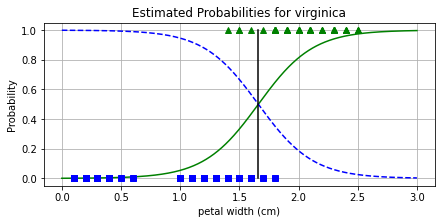

In [5]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

positive_idx = np.where(y == 1)[0]
negative_idx = np.where(y == 0)[0]
petal_width_1 = iris['data'][positive_idx,feature_index:]
petal_width_0 = iris['data'][negative_idx,feature_index:]
decision_boundary = X_new[np.where(np.abs(y_proba[:,0]-0.5) == np.min(np.abs(y_proba[:,0]-0.5)))][0]
print('Decision Boundary where ' + iris['feature_names'][feature_index] + ' = ' + str(np.round(decision_boundary[0],2)))
fig,ax = plt.subplots(1,1,figsize=(7,3))
ax.plot(X_new,y_proba[:,1],'g-')
ax.plot(X_new,y_proba[:,0],'b--')
ax.plot(petal_width_0,np.zeros((len(petal_width_0),)),'bs')
ax.plot(petal_width_1,np.ones((len(petal_width_1),)),'g^')
ax.plot(decision_boundary*np.ones((100,)),np.linspace(0,1,100),'k')
ax.grid(True)
ax.set_ylabel('Probability')
ax.set_xlabel(iris['feature_names'][feature_index])
ax.set_title('Estimated Probabilities for ' + iris['target_names'][target_index]);

Note from the above that the decision boundary is at petal_width = 1.66 cm. Any flower with a petal width less than this would be classified as not a virginica and viceversa. There is an overlap region between 1.5 to 1.8 cm where the classifier is less certain about this distinction.

### Regression with both petal length and width

In [14]:
feature_index = 2 # Get petal length
target_index = 2 # 1 if Iris Virginica, 0 otherwise
X2 = iris['data'][:,feature_index:] 
y = (iris['target'] == target_index).astype(np.int)

In [17]:
petal_length = np.linspace(3,7,21).reshape(-1,1)
petal_width = np.linspace(0.75,2.75,1000).reshape(-1,1)

decision_boundary_2 = np.zeros((3,petal_length.shape[0],2))
probs = [0.25,0.5,0.75]

log_reg_2 = LogisticRegression()
log_reg_2.fit(X2,y)

for i,pl in enumerate(petal_length):
  X2_new = np.c_[pl*np.ones((len(petal_width),1)),petal_width]
  y_proba = log_reg_2.predict_proba(X2_new)
  for j,pr in enumerate(probs):
    decision_boundary_2[j,i,:] = X2_new[np.where(np.abs(y_proba[:,0]-pr) == np.min(np.abs(y_proba[:,0]-pr)))[0][0],:]

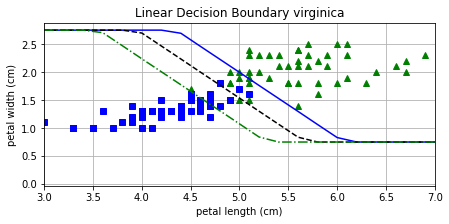

In [18]:
fig,ax = plt.subplots(1,1,figsize=(7,3))
ax.plot(X2[positive_idx,0],X2[positive_idx,1],'g^')
ax.plot(X2[negative_idx,0],X2[negative_idx,1],'bs')
ax.plot(decision_boundary_2[0][:,0],decision_boundary_2[0][:,1],'b')
ax.plot(decision_boundary_2[1][:,0],decision_boundary_2[1][:,1],'k--')
ax.plot(decision_boundary_2[2][:,0],decision_boundary_2[2][:,1],'g-.')
ax.grid(True)
ax.set_ylabel(iris['feature_names'][feature_index+1])
ax.set_xlabel(iris['feature_names'][feature_index])
ax.set_title('Linear Decision Boundary ' + iris['target_names'][target_index]);
ax.set_xlim([3,7]);

## Softmax Regression

In [12]:
X = iris["data"][:,(2,3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
petal_len = 5
petal_wid = 2
X_pred = [[5,2]]
print("Class:",softmax_reg.predict(X_pred))
print("Probability:",softmax_reg.predict_proba(X_pred))

Class: [2]
Probability: [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


## Support Vector Machine Classifier

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

y = (iris['target'] == 2).astype(np.float64) # Iris Virginica
svm_clf = Pipeline([('scaler', StandardScaler()),('linear_svc',LinearSVC(C=1,loss="hinge"))])
svm_clf.fit(X,y)
print("Class:",svm_clf.predict(X_pred))

Class: [1.]
